#Opening Parameter Images (.fimg) from PSI Software

This notebook demonstrates how to open binary files containing measurements captured with PSI - Photon Systems Instruments. PSI systems generate parameter images using data from thermal cameras, hyperspectral imaging, or FluoroCam fluorescence imaging. A parameter image is a mathematical result of raw images. These images can contain the average of different measurements, resulting in fluorescence intensity in each pixel or values representing temperatures if the data come from a thermal camera.

For example, the PSI FluorCam generates a parameter image called NDVI.fimg, which represents the Normalized Difference Vegetation Index (NDVI). This image is calculated using the formula:

NDVI = (NIR - RED) / (NIR + RED)

Where NIR (740nm filter) and RED (700 nm filter) correspond to fluorescence measurements in the near-infrared (NIR) and red (RED) spectral bands, respectively. Example files: **FcParamImage_Example_NIR.fimg, FcParamImage_Example_RED.fimg, FcParamImage_Example_NDVI.fimg**

Another typical application of FluoroCam is acquiring chlorophyll fluorescence measurements and calculating parameters such as the quantum yield during steady state (QY_Lss). This tutorial provides an example of how to open this type of file, using files stored in the example_files folder, which contains:

FM images: Chlorophyll fluorescence measurements taken during a saturation pulse of 8000 µmol. **FcParamImage_Example_Fm.fimg**

QY_Lss parameter images: These images represent quantum yield values calculated for each pixel under steady-state light conditions in photosystem II. The QY_Lss values range from 0 to 1. **FcParamImage_Example_QY_max.fimg**

##Please if you use this notebook quote:

Bengoa Luoni, S.A., Garassino, F., Aarts, M.G.M. (2024). A High-Throughput Approach for Photosynthesis Studies in a Brassicaceae Panel. In: Maghuly, F. (eds) Plant Functional Genomics. Methods in Molecular Biology, vol 2787. Humana, New York, NY. https://doi.org/10.1007/978-1-0716-3778-4_2


Jurado-Ruiz, F., Nguyen, T. P., Peller, J., Aranzana, M. J., Polder, G., & Aarts, M. G. M. (2024). LeTra: a leaf tracking workflow based on convolutional neural networks and intersection over union. Plant Methods, 20(1), Article 11. https://doi.org/10.1186/s13007-024-01138-x

In [ ]:
from google.colab import drive

#Conect your gmail drive to the netbook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

#Define a function to read a binary file and convert it into a NumPy array.

In [ ]:
def OpenFimg(p):
  with open(p, "rb") as f:
    data = f.read()
    header = np.frombuffer(data[:8], dtype=np.int32)
    #print("Header:", header[0], header[1])
    # Extract the rest of the data as 32-bit floats
    # (Make sure that the remaining byte count is a multiple of 4)
    floats = np.frombuffer(data[8:], dtype=np.float32)
    #print("Floats:", floats)
    image = np.reshape(floats, newshape=(header[1], header[0])) #Image size in pixels
    return image.copy()

#Access to your folder with images and save the files names in a python list

In [ ]:
# Create a list call list0 that conteings all the files in the folder fimg_files
list0 = os.listdir('/content/drive/MyDrive/Open-FIMGs/fimg_files')

In [ ]:
list0 = sorted(list0)
print(list0)

['FcParamImage_Example_Fm.fimg', 'FcParamImage_Example_NDVI.fimg', 'FcParamImage_Example_NIR.fimg', 'FcParamImage_Example_QY_max.fimg', 'FcParamImage_Example_RED.fimg', 'dddd.fimg', 'fsdf.fimg']


###We open the parameter images RED

In [ ]:
# To open FcParamImage_Example_RED.fimg, which contains fluorescence data in the red spectrum,
#we first need to create a path to the image by joining the folder path with the file name.
#The file name for the red spectrum image is stored in list0[4].

file= list0[4]

file_path = f'/content/drive/MyDrive/Open-FIMGs/fimg_files/{file}'
print(file_path)
# We use our funtion OpenFimg to access to the image and tranform the information in a numpy array
F_array = OpenFimg(file_path)

/content/drive/MyDrive/Open-FIMGs/fimg_files/FcParamImage_Example_RED.fimg


Text(0, 0.5, 'Y-axis')

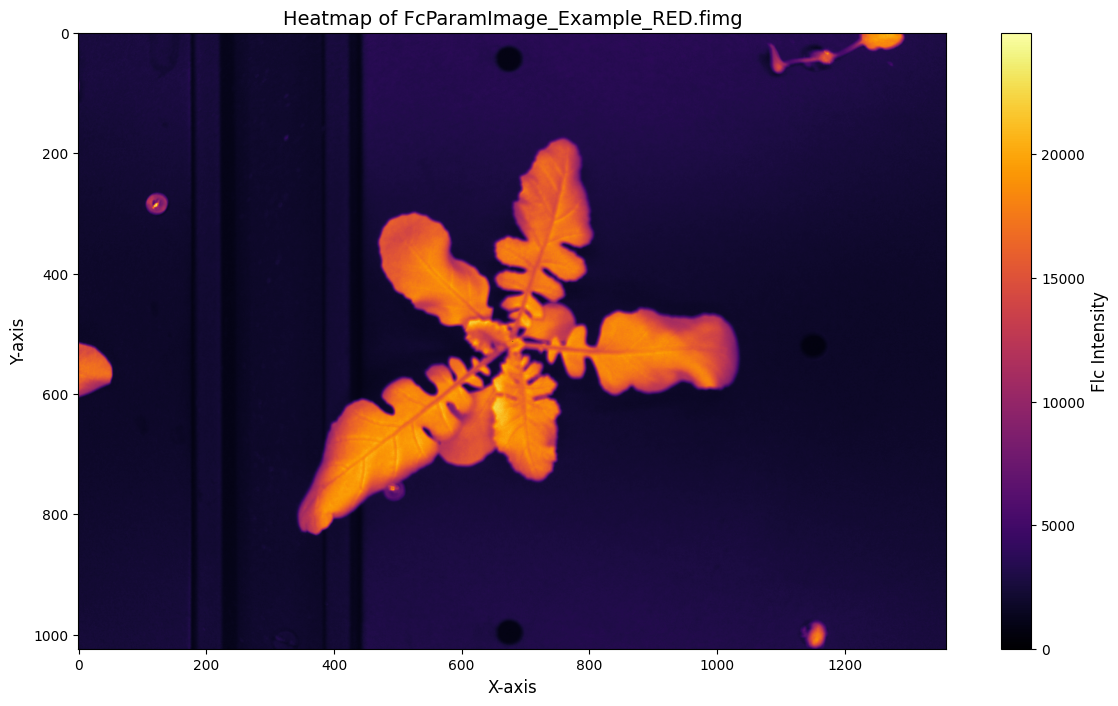

In [ ]:
# Now we can visualize our RED data

plt.figure(figsize=(14, 8))

# Display heatmap
img = plt.imshow(F_array, cmap='inferno', aspect='auto')

# Add colorbar (this is the reference for values)
cbar = plt.colorbar(img)
cbar.set_label("Flc Intensity", fontsize=12)  # Label for colorbar

# Add titles and labels
plt.title(f"Heatmap of {file}", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)



###We open the parameter images NIR

In [ ]:
# To open FcParamImage_Example_NIR.fimg, which contains fluorescence data in the red spectrum,
#we first need to create a path to the image by joining the folder path with the file name.
#The file name for the nir spectrum image is stored in list0[2].

file= list0[2]

file_path = f'/content/drive/MyDrive/Open-FIMGs/fimg_files/{file}'

# We use our funtion OpenFimg to access to the image and tranform the information in a numpy array
F_array = OpenFimg(file_path)

Text(0, 0.5, 'Y-axis')

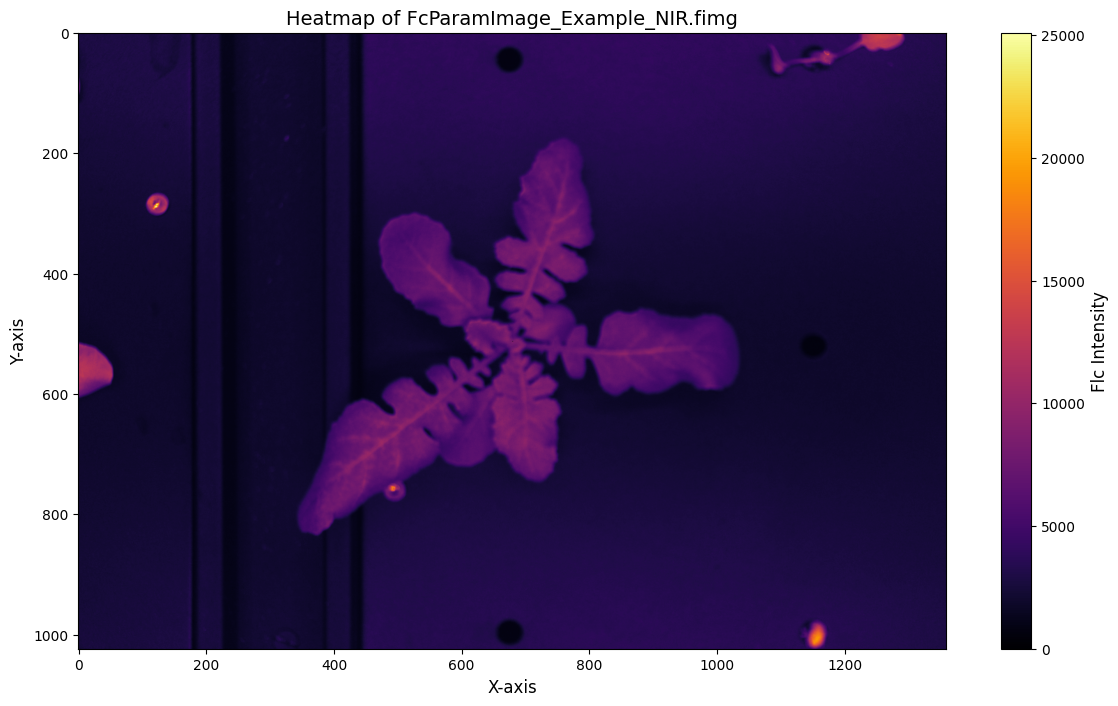

In [ ]:
# Now we can visualize our NIR data

plt.figure(figsize=(14, 8))

# Display heatmap
img = plt.imshow(F_array, cmap='inferno', aspect='auto')

# Add colorbar (this is the reference for values)
cbar = plt.colorbar(img)
cbar.set_label("Flc Intensity", fontsize=12)  # Label for colorbar

# Add titles and labels
plt.title(f"Heatmap of {file}", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)



###We open the parameter images NDVI

In [ ]:
# To open FcParamImage_Example_NDVI.fimg, which contains fluorescence data in the red spectrum,
#we first need to create a path to the image by joining the folder path with the file name.
#The file name for the nir spectrum image is stored in list0[1].

file= list0[1]

file_path = f'/content/drive/MyDrive/Open-FIMGs/fimg_files/{file}'

# We use our funtion OpenFimg to access to the image and tranform the information in a numpy array
F_array = OpenFimg(file_path)

Text(0, 0.5, 'Y-axis')

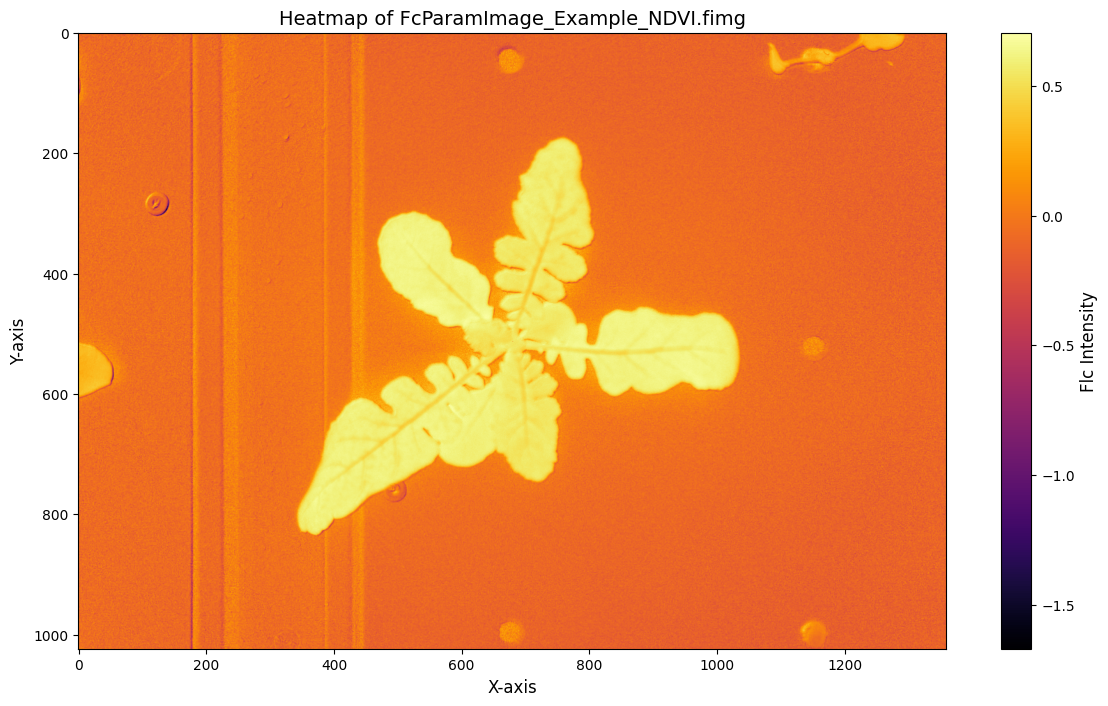

In [ ]:
# Now we can visualize our NDVI data

plt.figure(figsize=(14, 8))

# Display heatmap
img = plt.imshow(F_array, cmap='inferno', aspect='auto')

# Add colorbar (this is the reference for values)
cbar = plt.colorbar(img)
cbar.set_label("Flc Intensity", fontsize=12)  # Label for colorbar

# Add titles and labels
plt.title(f"Heatmap of {file}", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)



###We open the parameter images FM

In [ ]:
# To open FcParamImage_Example_FM.fimg, which contains fluorescence data in the red spectrum,
#we first need to create a path to the image by joining the folder path with the file name.
#The file name for the Fm image is stored in list0[0].

file= list0[6]

file_path = f'/content/drive/MyDrive/Open-FIMGs/fimg_files/{file}'

# We use our funtion OpenFimg to access to the image and tranform the information in a numpy array
F_array = OpenFimg(file_path)

Text(0, 0.5, 'Y-axis')

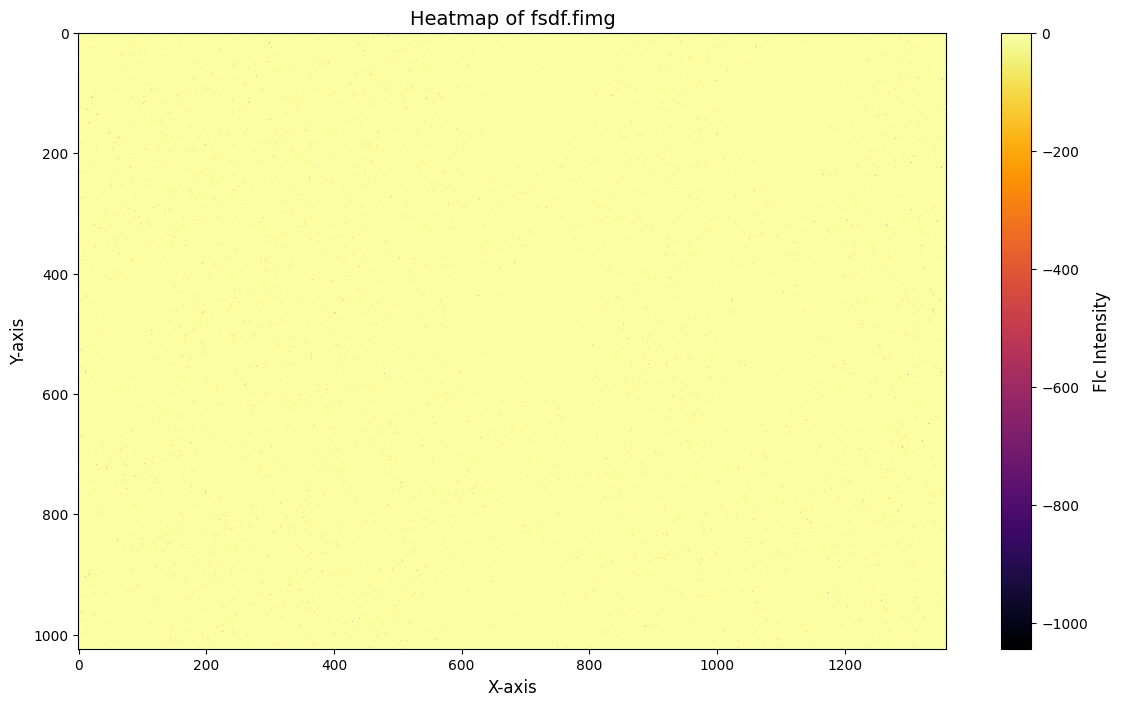

In [ ]:
# Now we can visualize our FM data

plt.figure(figsize=(14, 8))

# Display heatmap
img = plt.imshow(F_array, cmap='inferno', aspect='auto')

# Add colorbar (this is the reference for values)
cbar = plt.colorbar(img)
cbar.set_label("Flc Intensity", fontsize=12)  # Label for colorbar

# Add titles and labels
plt.title(f"Heatmap of {file}", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)



###We open the parameter images QY_Lss

In [ ]:
#This example is more complex because QY_Lss is calculated as (Fm - F0) / Fm.
#This type of calculation can produce negative values in the background.
#In such cases, we will take an extra step to correct for them. A better approach is to first mask the image.
#To learn how to do mask, continue with the next tutorial: Intelligent Masking."

file= list0[3]

file_path = f'/content/drive/MyDrive/Open-FIMGs/fimg_files/{file}'

# We use our funtion OpenFimg to access to the image and tranform the information in a numpy array
F_array = OpenFimg(file_path)

F_array[F_array < 0] = 0 ### with this line every negative value is converted to 0

Text(0, 0.5, 'Y-axis')

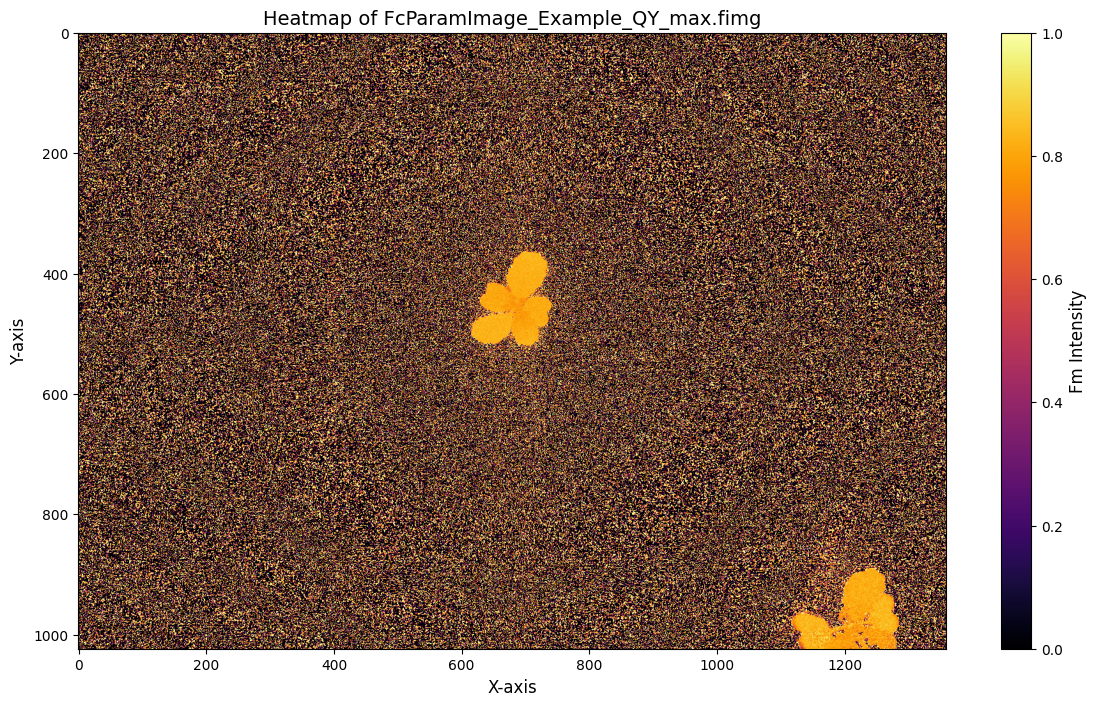

In [ ]:
# Now we can visualize our NIR data

plt.figure(figsize=(14, 8))

# Display heatmap
img = plt.imshow(F_array, cmap='inferno', aspect='auto')

# Add colorbar (this is the reference for values)
cbar = plt.colorbar(img)
cbar.set_label("Fm Intensity", fontsize=12)  # Label for colorbar

# Add titles and labels
plt.title(f"Heatmap of {file}", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)



Analysing maximus minimus and avarege values in each Parameter images

In [ ]:
data = []

for file_name in list0:
    file_path = f'/content/drive/MyDrive/Open-FIMGs/fimg_files/{file_name}'
    F_array = OpenFimg(file_path)
    F_array[F_array < 0] = 0  # Convert negative values to 0
    data.append({
        'File': file_name,
        'Mean': F_array.mean(),
        'Min': F_array.min(),
        'Max': F_array.max()
    })

df = pd.DataFrame(data)


In [ ]:
from IPython.display import display
display(df)

File         Mean  Min           Max
0      FcParamImage_Example_Fm.fimg   181.492783  0.0  14975.333008
1    FcParamImage_Example_NDVI.fimg     0.073550  0.0      0.704043
2     FcParamImage_Example_NIR.fimg  3035.412354  0.0  25108.625000
3  FcParamImage_Example_QY_max.fimg     0.331201  0.0      1.000000
4     FcParamImage_Example_RED.fimg  3896.905029  0.0  24918.875000
5                         dddd.fimg   267.495544  0.0  13891.000000
6                         fsdf.fimg     0.378890  0.0      1.000000